<a href="https://colab.research.google.com/github/Oppepper97/Thesis/blob/main/K_Means_clustering_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means clustering model for identifying where the most space and the greatest concentration of players are expected to be on the field.


In this Jupyter Notebook I will develop a K-means clustering model that can give explanation to the game principle of control of space. Additionally, I will make an interactive 'dashboard' in which the tracking and event data can be visualized and interacted with. Unfortunately, Colab is using Python which makes dashboarding quite difficult. However, we can still make interactive visualizations in all ways, shapes and forms. 

This model seeks to divide the data into K groups, with each data point belonging to the cluster with the closest mean. By combining related data points, K-Means clustering on the extracted features (such as player locations, distances, and spatial parameters) can be used to identify specific spaces on the field. I visualize and comprehend spatial patterns in defensive game principles with the aid of the generated clusters.

*Note* Debugging was done using Stackoverflow and Chat GPT-4.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import re


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Sample_Game_1_RawEventsData.csv to Sample_Game_1_RawEventsData.csv
Saving Sample_Game_1_RawTrackingData_Away_Team.csv to Sample_Game_1_RawTrackingData_Away_Team.csv
Saving Sample_Game_1_RawTrackingData_Home_Team.csv to Sample_Game_1_RawTrackingData_Home_Team.csv
User uploaded file "Sample_Game_1_RawEventsData.csv" with length 139446 bytes
User uploaded file "Sample_Game_1_RawTrackingData_Away_Team.csv" with length 32782073 bytes
User uploaded file "Sample_Game_1_RawTrackingData_Home_Team.csv" with length 32782961 bytes


In [3]:
df_event_data = pd.read_csv('Sample_Game_1_RawEventsData.csv')
df_tracking_home = pd.read_csv('Sample_Game_1_RawTrackingData_Home_Team.csv', header=[0,1])
df_tracking_away = pd.read_csv('Sample_Game_1_RawTrackingData_Away_Team.csv', header=[0,1])


<ipython-input-3-425bd6709428>:2: DtypeWarning: Columns (0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tracking_home = pd.read_csv('Sample_Game_1_RawTrackingData_Home_Team.csv', header=[0,1])
<ipython-input-3-425bd6709428>:3: DtypeWarning: Columns (0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tracking_away = pd.read_csv('Sample_Game_1_RawTrackingData_Away_Team.csv', header=[0,1])


# Renaming columns tracking datasets

In [4]:
df_tracking_away.head(5)

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0      Away  \
  Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1        25   
0             Period              Frame           Time [s]  Player25   
1                  1                  1               0.04   0.90509   
2                  1                  2               0.08   0.90494   
3                  1                  3               0.12   0.90434   
4                  1                  4               0.16   0.90377   

  Unnamed: 4_level_0      Away Unnamed: 6_level_0      Away  \
  Unnamed: 4_level_1        15 Unnamed: 6_level_1        16   
0                NaN  Player15                NaN  Player16   
1            0.47462   0.58393            0.20794   0.67658   
2            0.47462   0.58393            0.20794   0.67658   
3            0.47463   0.58393            0.20794   0.67658   
4            0.47463   0.58351            0.20868    0.6764   

  Unnamed: 8_level_0      Away  ...           Unnamed: 24_level_0      Away  \
  Unnamed: 8_level_1        17  ...        24 Unnamed: 24_level_1        26   
0                NaN  Player17  ...  Player24                 NaN  Player26   
1            0.46710    0.6731  ...   0.37833             0.27383       NaN   
2            0.46710    0.6731  ...   0.37833             0.27383       NaN   
3            0.46710    0.6731  ...   0.37833             0.27383       NaN   
4            0.46762   0.67279  ...   0.37756             0.27473       NaN   

  Unnamed: 26_level_0      Away Unnamed: 28_level_0      Away  \
  Unnamed: 26_level_1        27 Unnamed: 28_level_1        28   
0                 NaN  Player27                 NaN  Player28   
1                 NaN       NaN                 NaN       NaN   
2                 NaN       NaN                 NaN       NaN   
3                 NaN       NaN                 NaN       NaN   
4                 NaN       NaN                 NaN       NaN   

  Unnamed: 30_level_0                Away Unnamed: 32_level_0  
  Unnamed: 30_level_1 Unnamed: 31_level_1 Unnamed: 32_level_1  
0                 NaN                Ball                 NaN  
1                 NaN             0.45472             0.38709  
2                 NaN             0.49645             0.40656  
3                 NaN             0.53716             0.42556  
4                 NaN             0.55346             0.42231  

[5 rows x 33 columns]

In [5]:
df_tracking_home.head(5)

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0      Home  \
  Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1        11   
0             Period              Frame           Time [s]  Player11   
1                  1                  1               0.04   0.00082   
2                  1                  2               0.08   0.00096   
3                  1                  3               0.12   0.00114   
4                  1                  4               0.16   0.00121   

  Unnamed: 4_level_0     Home Unnamed: 6_level_0     Home Unnamed: 8_level_0  \
  Unnamed: 4_level_1        1 Unnamed: 6_level_1        2 Unnamed: 8_level_1   
0                NaN  Player1                NaN  Player2                NaN   
1            0.48238  0.32648            0.65322  0.33701            0.48863   
2            0.48238  0.32648            0.65322  0.33701            0.48863   
3            0.48238  0.32648            0.65322  0.33701            0.48863   
4            0.48238  0.32622            0.65317  0.33687            0.48988   

      Home  ...           Unnamed: 24_level_0      Home Unnamed: 26_level_0  \
         3  ...        10 Unnamed: 24_level_1        12 Unnamed: 26_level_1   
0  Player3  ...  Player10                 NaN  Player12                 NaN   
1  0.30927  ...   0.55243             0.43269       NaN                 NaN   
2  0.30927  ...   0.55243             0.43269       NaN                 NaN   
3  0.30927  ...   0.55243             0.43269       NaN                 NaN   
4  0.30944  ...   0.55236             0.43313       NaN                 NaN   

       Home Unnamed: 28_level_0      Home Unnamed: 30_level_0  \
         13 Unnamed: 28_level_1        14 Unnamed: 30_level_1   
0  Player13                 NaN  Player14                 NaN   
1       NaN                 NaN       NaN                 NaN   
2       NaN                 NaN       NaN                 NaN   
3       NaN                 NaN       NaN                 NaN   
4       NaN                 NaN       NaN                 NaN   

  Unnamed: 31_level_0 Unnamed: 32_level_0  
  Unnamed: 31_level_1 Unnamed: 32_level_1  
0                Ball                 NaN  
1             0.45472             0.38709  
2             0.49645             0.40656  
3             0.53716             0.42556  
4             0.55346             0.42231  

[5 rows x 33 columns]

In [6]:
df_event_data.head(5)

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,1,0.04,0,0.00,Player19,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,1,0.04,3,0.12,Player19,Player21,0.45,0.39,0.55,0.43
2,Away,PASS,NaN,1,3,0.12,17,0.68,Player21,Player15,0.55,0.43,0.58,0.21
3,Away,PASS,NaN,1,45,1.80,61,2.44,Player15,Player19,0.55,0.19,0.45,0.31
4,Away,PASS,NaN,1,77,3.08,96,3.84,Player19,Player21,0.45,0.32,0.49,0.47


Renaming the columns from df_tracking for better readability


In [7]:
# Flatten the multi-index header
df_tracking_home.columns = ['_'.join(col).strip() for col in df_tracking_home.columns.values]

# Define new column names
column_names = ['Period', 'Frame', 'Time [s]', 
                'Player11_x', 'Player11_y', 'Player1_x', 'Player1_y', 'Player2_x', 'Player2_y', 
                'Player3_x', 'Player3_y', 'Player4_x', 'Player4_y', 'Player5_x', 'Player5_y', 
                'Player6_x', 'Player6_y', 'Player7_x', 'Player7_y', 'Player8_x', 'Player8_y', 
                'Player9_x', 'Player9_y', 'Player10_x', 'Player10_y', 'Player12_x', 'Player12_y', 
                'Player13_x', 'Player13_y', 'Player14_x', 'Player14_y', 'Ball_x', 'Ball_y']

# Rename columns
df_tracking_home.columns = column_names

In [8]:
df_tracking_home.head(5)

,Period,Frame,Time [s],Player11_x,Player11_y,Player1_x,Player1_y,Player2_x,Player2_y,Player3_x,...,Player10_x,Player10_y,Player12_x,Player12_y,Player13_x,Player13_y,Player14_x,Player14_y,Ball_x,Ball_y
0,Period,Frame,Time [s],Player11,NaN,Player1,NaN,Player2,NaN,Player3,...,Player10,NaN,Player12,NaN,Player13,NaN,Player14,NaN,Ball,NaN
1,1,1,0.04,0.00082,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55243,0.43269,NaN,NaN,NaN,NaN,NaN,NaN,0.45472,0.38709
2,1,2,0.08,0.00096,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55243,0.43269,NaN,NaN,NaN,NaN,NaN,NaN,0.49645,0.40656
3,1,3,0.12,0.00114,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55243,0.43269,NaN,NaN,NaN,NaN,NaN,NaN,0.53716,0.42556
4,1,4,0.16,0.00121,0.48238,0.32622,0.65317,0.33687,0.48988,0.30944,...,0.55236,0.43313,NaN,NaN,NaN,NaN,NaN,NaN,0.55346,0.42231


In [9]:
# Flatten the multi-index header
df_tracking_away.columns = ['_'.join(col).strip() for col in df_tracking_away.columns.values]

# Define new column names
column_names = ['Period', 'Frame', 'Time [s]', 
                'Player25_x', 'Player25_y', 'Player15_x', 'Player15_y', 'Player16_x', 'Player16_y', 
                'Player17_x', 'Player17_y', 'Player18_x', 'Player18_y', 'Player19_x', 'Player19_y', 
                'Player20_x', 'Player20_y', 'Player21_x', 'Player21_y', 'Player22_x', 'Player22_y', 
                'Player23_x', 'Player23_y', 'Player24_x', 'Player24_y', 'Player26_x', 'Player26_y', 
                'Player27_x', 'Player27_y', 'Player28_x', 'Player28_y', 'Ball_x', 'Ball_y']

# Rename columns
df_tracking_away.columns = column_names

In [10]:
df_tracking_away.head(5)

,Period,Frame,Time [s],Player25_x,Player25_y,Player15_x,Player15_y,Player16_x,Player16_y,Player17_x,...,Player24_x,Player24_y,Player26_x,Player26_y,Player27_x,Player27_y,Player28_x,Player28_y,Ball_x,Ball_y
0,Period,Frame,Time [s],Player25,NaN,Player15,NaN,Player16,NaN,Player17,...,Player24,NaN,Player26,NaN,Player27,NaN,Player28,NaN,Ball,NaN
1,1,1,0.04,0.90509,0.47462,0.58393,0.20794,0.67658,0.46710,0.6731,...,0.37833,0.27383,NaN,NaN,NaN,NaN,NaN,NaN,0.45472,0.38709
2,1,2,0.08,0.90494,0.47462,0.58393,0.20794,0.67658,0.46710,0.6731,...,0.37833,0.27383,NaN,NaN,NaN,NaN,NaN,NaN,0.49645,0.40656
3,1,3,0.12,0.90434,0.47463,0.58393,0.20794,0.67658,0.46710,0.6731,...,0.37833,0.27383,NaN,NaN,NaN,NaN,NaN,NaN,0.53716,0.42556
4,1,4,0.16,0.90377,0.47463,0.58351,0.20868,0.6764,0.46762,0.67279,...,0.37756,0.27473,NaN,NaN,NaN,NaN,NaN,NaN,0.55346,0.42231


The first row of the dataframes is duplicated with the column names. We will remove this row. Also, we need to convert the data types of the columns for the following processing steps. The columns 'Period' and 'Frame' should be integers, 'Time [s]' should be a float, and the player and ball positions should also be float

## df_tracking_away


In [11]:
# Remove the first row
df_tracking_away = df_tracking_away.iloc[1:]

# Convert the data types of the columns
df_tracking_away = df_tracking_away.astype({
    'Period': 'int',
    'Frame': 'int',
    'Time [s]': 'float',
    'Player25_x': 'float', 'Player25_y': 'float',
    'Player15_x': 'float', 'Player15_y': 'float',
    'Player16_x': 'float', 'Player16_y': 'float',
    'Player17_x': 'float', 'Player17_y': 'float',
    'Player18_x': 'float', 'Player18_y': 'float',
    'Player19_x': 'float', 'Player19_y': 'float',
    'Player20_x': 'float', 'Player20_y': 'float',
    'Player21_x': 'float', 'Player21_y': 'float',
    'Player22_x': 'float', 'Player22_y': 'float',
    'Player23_x': 'float', 'Player23_y': 'float',
    'Player24_x': 'float', 'Player24_y': 'float',
    'Player26_x': 'float', 'Player26_y': 'float',
    'Player27_x': 'float', 'Player27_y': 'float',
    'Player28_x': 'float', 'Player28_y': 'float',
    'Ball_x': 'float', 'Ball_y': 'float'
})

# Check the first 5 rows of the cleaned DataFrame
df_tracking_away.head(5)


,Period,Frame,Time [s],Player25_x,Player25_y,Player15_x,Player15_y,Player16_x,Player16_y,Player17_x,...,Player24_x,Player24_y,Player26_x,Player26_y,Player27_x,Player27_y,Player28_x,Player28_y,Ball_x,Ball_y
1,1,1,0.04,0.90509,0.47462,0.58393,0.20794,0.67658,0.46710,0.67310,...,0.37833,0.27383,NaN,NaN,NaN,NaN,NaN,NaN,0.45472,0.38709
2,1,2,0.08,0.90494,0.47462,0.58393,0.20794,0.67658,0.46710,0.67310,...,0.37833,0.27383,NaN,NaN,NaN,NaN,NaN,NaN,0.49645,0.40656
3,1,3,0.12,0.90434,0.47463,0.58393,0.20794,0.67658,0.46710,0.67310,...,0.37833,0.27383,NaN,NaN,NaN,NaN,NaN,NaN,0.53716,0.42556
4,1,4,0.16,0.90377,0.47463,0.58351,0.20868,0.67640,0.46762,0.67279,...,0.37756,0.27473,NaN,NaN,NaN,NaN,NaN,NaN,0.55346,0.42231
5,1,5,0.20,0.90324,0.47464,0.58291,0.21039,0.67599,0.46769,0.67253,...,0.37663,0.27543,NaN,NaN,NaN,NaN,NaN,NaN,0.55512,0.40570


It appears the columns 'Player26', 'Player27', and 'Player28' for df_tracking_away have only NaN values, likely meaning these players were not part of the game or their data wasn't recorded. Thus, we will drop these columns.

In [12]:
# Drop the columns
df_tracking_away = df_tracking_away.drop(columns=['Player26_x', 'Player26_y', 'Player27_x', 'Player27_y', 'Player28_x', 'Player28_y'])

# Check the result
df_tracking_away.head(5)


,Period,Frame,Time [s],Player25_x,Player25_y,Player15_x,Player15_y,Player16_x,Player16_y,Player17_x,...,Player21_x,Player21_y,Player22_x,Player22_y,Player23_x,Player23_y,Player24_x,Player24_y,Ball_x,Ball_y
1,1,1,0.04,0.90509,0.47462,0.58393,0.20794,0.67658,0.46710,0.67310,...,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383,0.45472,0.38709
2,1,2,0.08,0.90494,0.47462,0.58393,0.20794,0.67658,0.46710,0.67310,...,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383,0.49645,0.40656
3,1,3,0.12,0.90434,0.47463,0.58393,0.20794,0.67658,0.46710,0.67310,...,0.55243,0.43269,0.50067,0.94322,0.43693,0.05002,0.37833,0.27383,0.53716,0.42556
4,1,4,0.16,0.90377,0.47463,0.58351,0.20868,0.67640,0.46762,0.67279,...,0.55236,0.43313,0.50034,0.94391,0.43644,0.05038,0.37756,0.27473,0.55346,0.42231
5,1,5,0.20,0.90324,0.47464,0.58291,0.21039,0.67599,0.46769,0.67253,...,0.55202,0.43311,0.50017,0.94434,0.43580,0.04977,0.37663,0.27543,0.55512,0.40570


## df_tracking_home

In [13]:
# Remove the first row
df_tracking_home = df_tracking_home.iloc[1:]

# Convert the data types of the columns
df_tracking_home = df_tracking_home.astype({
    'Period': 'int',
    'Frame': 'int',
    'Time [s]': 'float',
    'Player1_x': 'float', 'Player1_y': 'float',
    'Player2_x': 'float', 'Player2_y': 'float',
    'Player3_x': 'float', 'Player3_y': 'float',
    'Player4_x': 'float', 'Player4_y': 'float',
    'Player5_x': 'float', 'Player5_y': 'float',
    'Player6_x': 'float', 'Player6_y': 'float',
    'Player7_x': 'float', 'Player7_y': 'float',
    'Player8_x': 'float', 'Player8_y': 'float',
    'Player9_x': 'float', 'Player9_y': 'float',
    'Player10_x': 'float', 'Player10_y': 'float',
    'Player11_x': 'float', 'Player11_y': 'float',
    'Ball_x': 'float', 'Ball_y': 'float'
})

# Check the first 5 rows of the cleaned DataFrame
df_tracking_home.head(5)


,Period,Frame,Time [s],Player11_x,Player11_y,Player1_x,Player1_y,Player2_x,Player2_y,Player3_x,...,Player10_x,Player10_y,Player12_x,Player12_y,Player13_x,Player13_y,Player14_x,Player14_y,Ball_x,Ball_y
1,1,1,0.04,0.00082,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55243,0.43269,NaN,NaN,NaN,NaN,NaN,NaN,0.45472,0.38709
2,1,2,0.08,0.00096,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55243,0.43269,NaN,NaN,NaN,NaN,NaN,NaN,0.49645,0.40656
3,1,3,0.12,0.00114,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55243,0.43269,NaN,NaN,NaN,NaN,NaN,NaN,0.53716,0.42556
4,1,4,0.16,0.00121,0.48238,0.32622,0.65317,0.33687,0.48988,0.30944,...,0.55236,0.43313,NaN,NaN,NaN,NaN,NaN,NaN,0.55346,0.42231
5,1,5,0.20,0.00129,0.48238,0.32597,0.65269,0.33664,0.49018,0.30948,...,0.55202,0.43311,NaN,NaN,NaN,NaN,NaN,NaN,0.55512,0.40570


# Reshaping dataset


Converting the wide-format dataset into a long-format dataset with one row per player per timestamp. This will allow us to easily extract features and apply clustering algorithms.
Firstly we melt the dataframes to create a long-format dataset. Then we split the 'player_coord' column into 'player' and 'coord' columns. Lastly, we pivot the df to have seperate columns for the x and y coordinates.

In [14]:
# Defining function to preprocess the tracking data
def preprocess_tracking_data(df, team):
    # Melting the DataFrame to create a long-format dataset
    df_long = df.melt(id_vars=['Period', 'Frame', 'Time [s]'], var_name='Player_coord', value_name='Coordinate')
    
    # Splitting 'Player_coord' column into 'Player' and 'Coord' columns
    df_long[['Player', 'Coord']] = df_long['Player_coord'].str.extract(r'(Player\d+|Ball)_(x|y)')
    
    # Pivotting the DataFrame to have separate columns for x and y coordinates
    df_long = df_long.pivot_table(index=['Period', 'Frame', 'Time [s]', 'Player'], columns='Coord', values='Coordinate', aggfunc='first').reset_index()
    df_long.columns.name = None
    
    # Adding a 'Team' column to differentiate between home and away data
    df_long['Team'] = team
    
    return df_long

# Preprocessing the home and away tracking data
df_long_home = preprocess_tracking_data(df_tracking_home, 'Home')
df_long_away = preprocess_tracking_data(df_tracking_away, 'Away')


In [15]:
# Concatenating home and away data
df_long = pd.concat([df_long_home, df_long_away])

# Extracting player and ball positions
df_players = df_long[df_long['Player'].str.startswith('Player')]
df_ball = df_long[df_long['Player'] == 'Ball'].rename(columns={'x': 'x_ball', 'y': 'y_ball'})

# Merging player and ball positions
df_players_ball = pd.merge(df_players, df_ball, on=['Period', 'Frame', 'Time [s]'])


In [16]:
df_long.head(5)

,Period,Frame,Time [s],Player,x,y,Team
0,1,1,0.04,Ball,0.45472,0.38709,Home
1,1,1,0.04,Player1,0.32648,0.65322,Home
2,1,1,0.04,Player10,0.55243,0.43269,Home
3,1,1,0.04,Player11,0.00082,0.48238,Home
4,1,1,0.04,Player2,0.33701,0.48863,Home


In [17]:
df_players.head(5)

,Period,Frame,Time [s],Player,x,y,Team
1,1,1,0.04,Player1,0.32648,0.65322,Home
2,1,1,0.04,Player10,0.55243,0.43269,Home
3,1,1,0.04,Player11,0.00082,0.48238,Home
4,1,1,0.04,Player2,0.33701,0.48863,Home
5,1,1,0.04,Player3,0.30927,0.35529,Home


In [18]:
df_players_ball.head(5)

,Period,Frame,Time [s],Player_x,x,y,Team_x,Player_y,x_ball,y_ball,Team_y
0,1,1,0.04,Player1,0.32648,0.65322,Home,Ball,0.45472,0.38709,Home
1,1,1,0.04,Player1,0.32648,0.65322,Home,Ball,0.45472,0.38709,Away
2,1,1,0.04,Player10,0.55243,0.43269,Home,Ball,0.45472,0.38709,Home
3,1,1,0.04,Player10,0.55243,0.43269,Home,Ball,0.45472,0.38709,Away
4,1,1,0.04,Player11,0.00082,0.48238,Home,Ball,0.45472,0.38709,Home


# Calculating features

::With the long-format dataset, we can now easily compute features such as distances between players, distances to the ball, or spatial features like Voronoi diagrams using the euclidean distance, which helps me understand how the playing area is divided among the players. 

To calculate these distances, we use a method called the Euclidean distance. It is a common technique in data science to measure the straight-line distance between two points in a two-dimensional space, like a plane. This measurement helps us understand the relationships and spatial patterns within the dataset.

In [19]:
from scipy.spatial import distance

In [20]:
# Ensuring the coordinate columns are of numeric type
for col in ['x', 'y', 'x_ball', 'y_ball']:
    df_players_ball[col] = pd.to_numeric(df_players_ball[col], errors='coerce')

# Dropping any rows with missing coordinates
df_players_ball.dropna(subset=['x', 'y', 'x_ball', 'y_ball'], inplace=True)

# Calculating the distance of each player to the ball
df_players_ball['distance_to_ball'] = df_players_ball.apply(
    lambda row: distance.euclidean((row['x'], row['y']), (row['x_ball'], row['y_ball'])), axis=1)


In [21]:
# Getting the ball's coordinates
df_ball = df_long[df_long['Player'] == 'Ball']

# Merging df_players and df_ball to calculate the distance of each player to the ball
df_players_ball = pd.merge(df_players, df_ball, on=['Period', 'Frame', 'Time [s]'], suffixes=('', '_ball'))

# Calculating the distance of each player to the ball
df_players_ball['distance_to_ball'] = df_players_ball.apply(lambda row: distance.euclidean((row['x'], row['y']), (row['x_ball'], row['y_ball'])), axis=1)

# Visualizing df_tracking home & away

At first, we will visualize the distance of each player to the ball with a scatterplot. 
Each point is proportional to the player's distance from the ball.

In [22]:
import matplotlib.pyplot as plt

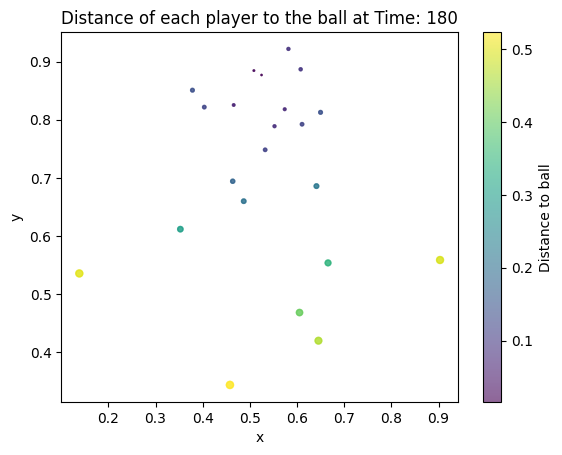

In [23]:
# Setting the specific time
time_specific = 180

# Filtering the dataframe based on the specific time
df_players_ball_specific_time = df_players_ball[df_players_ball['Time [s]'] == time_specific]

# Creating a figure and axes
fig, ax = plt.subplots()

# Creating a scatter plot of player positions at the specific time
scatter = ax.scatter(df_players_ball_specific_time['x'], df_players_ball_specific_time['y'], 
                     c=df_players_ball_specific_time['distance_to_ball'], 
                     cmap='viridis', 
                     s=df_players_ball_specific_time['distance_to_ball']*50, # Scale factor for visibility
                     alpha=0.6)

# Creating a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Distance to ball')

# Adding labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Distance of each player to the ball at Time: {}'.format(time_specific))

# Showing the plot
plt.show()


## Heatmap

In [24]:
import seaborn as sns

<ipython-input-25-0305b9ea8852>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_players_ball_specific_time['x_bin'] = pd.cut(df_players_ball_specific_time['x'], bins=bins_x)
<ipython-input-25-0305b9ea8852>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_players_ball_specific_time['y_bin'] = pd.cut(df_players_ball_specific_time['y'], bins=bins_y)


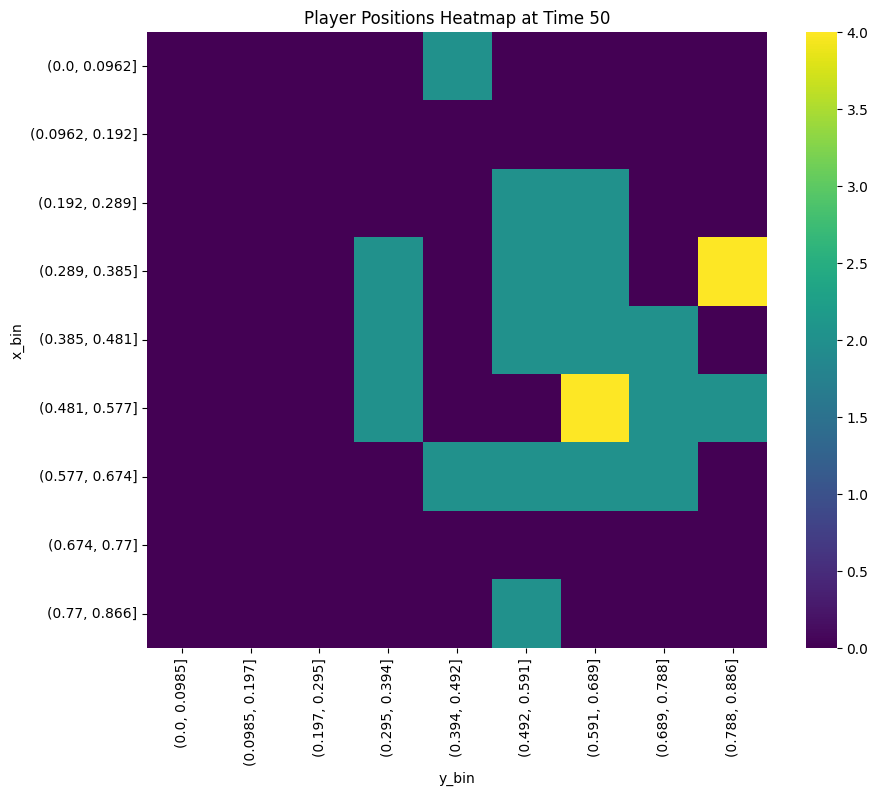

In [25]:
# Specify the desired time
time_specific = 50

# Filter the dataframe based on time
df_players_ball_specific_time = df_players_ball[df_players_ball['Time [s]'] == time_specific]

# Discretize the field into a grid of cells
bins_x = np.linspace(0, df_players_ball_specific_time['x'].max(), 10)
bins_y = np.linspace(0, df_players_ball_specific_time['y'].max(), 10)
df_players_ball_specific_time['x_bin'] = pd.cut(df_players_ball_specific_time['x'], bins=bins_x)
df_players_ball_specific_time['y_bin'] = pd.cut(df_players_ball_specific_time['y'], bins=bins_y)

# Count the number of player positions that fall into each cell
heatmap_data = df_players_ball_specific_time.groupby(['x_bin', 'y_bin']).size().unstack()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Player Positions Heatmap at Time {}'.format(time_specific))
plt.show()

How to read this heatmap:

The X-axis and Y-axis represent the width and length of the football pitch respectively. Depending on the orientation, one end of X-axis might represent one goal, and the other end might represent the opposite goal. The same applies for Y-axis.

In this case, at time [50] during the match, the play was happening on the center-right side of the pitch. You can see the two goalkeepers on both ends, and the yellow square suggests that there is a high frequency of players here.

# Finding the centroid

Finding the centroid of player positions can be useful in understanding the spatial organization of players. The centroid represents the average position of the players and can provide insights into the overall team shape and structure

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


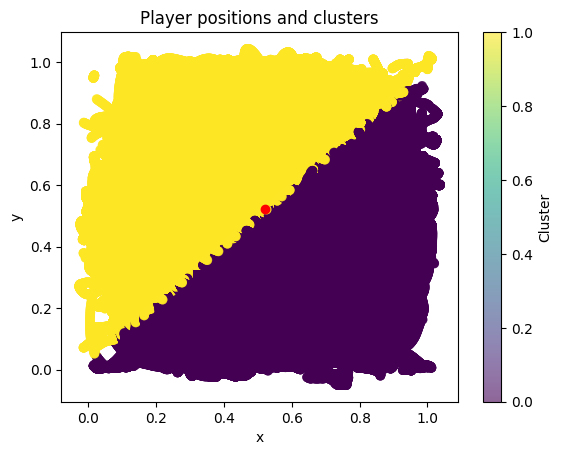

In [26]:
from sklearn.cluster import KMeans

# Calculate the centroid of player positions
centroid_x = df_players_ball['x'].mean()
centroid_y = df_players_ball['y'].mean()

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_players_ball[['x', 'y']])

# Add cluster labels to the DataFrame
df_players_ball['cluster'] = kmeans.labels_

# Visualize the player positions, centroid, and clusters
fig, ax = plt.subplots()

scatter = ax.scatter(df_players_ball['x'], df_players_ball['y'], c=df_players_ball['cluster'], cmap='viridis', alpha=0.6)

ax.scatter(centroid_x, centroid_y, color='red')  # Centroid

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Player positions and clusters')

plt.show()


*Note* this is an example of the centroid from the full match. That is why it is so chaotic and not readable. In the next step we will find the centroid again, but now at a specific moment of the match.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-27-10589db1cb49>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_players_ball_specific_time['cluster'] = kmeans.labels_


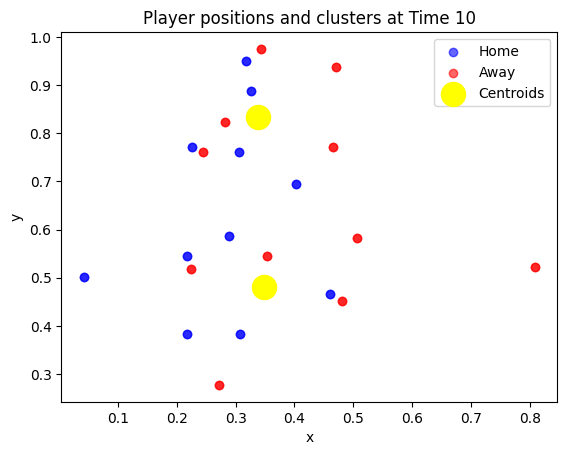

In [27]:
# Filtering the data to only include positions at a specific point in time
time_specific = 10 
df_players_ball_specific_time = df_players_ball[df_players_ball['Time [s]'] == time_specific]

# Applying K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_players_ball_specific_time[['x', 'y']])

# Add clustering labels to the DataFrame
df_players_ball_specific_time['cluster'] = kmeans.labels_

# Visualizing the player positions, centroid, and clusters
fig, ax = plt.subplots()

# Differentiating between teams
for team, color in zip(['Home', 'Away'], ['blue', 'red']):
    df_team = df_players_ball_specific_time[df_players_ball_specific_time['Team'] == team]
    ax.scatter(df_team['x'], df_team['y'], color=color, alpha=0.6, label=team)

# Centroid
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='yellow', s=300, label='Centroids')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Player positions and clusters at Time {}'.format(time_specific))
ax.legend()

plt.show()


This scatterplot shows the centroid, the central point of each cluster, of both teams when the game has just started. The centroid for the away team is at (0.32,0.5), and for the home team it is at (0.32, 0.81). This is because the game has just started, and players are clustered around the center of the pitch.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-28-aa609889cf9e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_players_ball_specific_time['cluster'] = kmeans.labels_


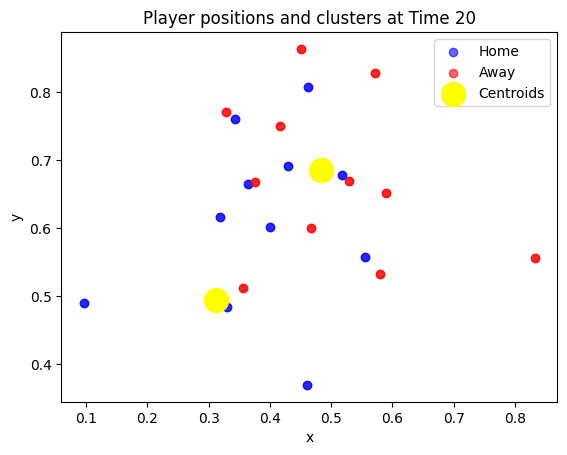

In [28]:
# Filtering the data to only include positions at a specific point in time
time_specific = 20 
df_players_ball_specific_time = df_players_ball[df_players_ball['Time [s]'] == time_specific]

# Applying K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_players_ball_specific_time[['x', 'y']])

# Add clustering labels to the DataFrame
df_players_ball_specific_time['cluster'] = kmeans.labels_

# Visualizing the player positions, centroid, and clusters
fig, ax = plt.subplots()

# Differentiating between teams
for team, color in zip(['Home', 'Away'], ['blue', 'red']):
    df_team = df_players_ball_specific_time[df_players_ball_specific_time['Team'] == team]
    ax.scatter(df_team['x'], df_team['y'], color=color, alpha=0.6, label=team)

# Centroid
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='yellow', s=300, label='Centroids')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Player positions and clusters at Time {}'.format(time_specific))
ax.legend()

plt.show()


When Time is set at 20, the centroids change, because play is advancing. Now the centroid has shifted to different coordinates. The centroid of the home team has shifted to the center of the pitch, which can indicate that they are building-up or defending from the center of their own half. 

Now let's add a ball to the plot to get more insights.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-29-3b3a03c4698f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_players_ball_specific_time['cluster'] = kmeans.labels_


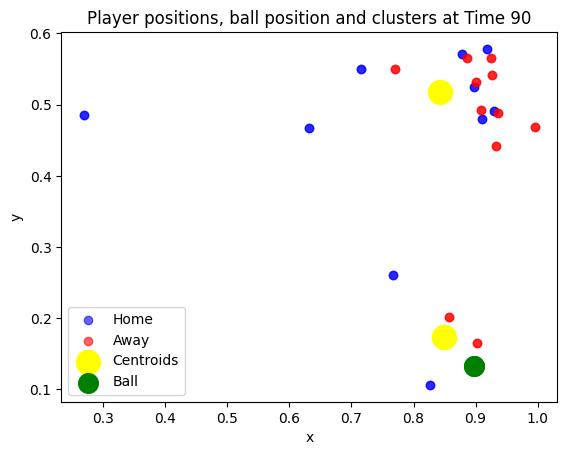

In [29]:
# Filtering the data to only include positions at a specific point in time
time_specific = 90
df_players_ball_specific_time = df_players_ball[df_players_ball['Time [s]'] == time_specific]

# Get the ball position at the specific time
df_ball_specific_time = df_ball[df_ball['Time [s]'] == time_specific]

# Applying K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_players_ball_specific_time[['x', 'y']])

# Add clustering labels to the DataFrame
df_players_ball_specific_time['cluster'] = kmeans.labels_

# Visualizing the player positions, centroid, and clusters
fig, ax = plt.subplots()

# Differentiating between teams
for team, color in zip(['Home', 'Away'], ['blue', 'red']):
    df_team = df_players_ball_specific_time[df_players_ball_specific_time['Team'] == team]
    ax.scatter(df_team['x'], df_team['y'], color=color, alpha=0.6, label=team)

# Centroid
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='yellow', s=300, label='Centroids')

# Ball position (note: if there are multiple ball positions at the same time, this will plot all of them)
ax.scatter(df_ball_specific_time['x'], df_ball_specific_time['y'], color='green', s=200, label='Ball')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Player positions, ball position and clusters at Time {}'.format(time_specific))
ax.legend()

plt.show()


Above and below you can see a scatterplot that shows the player positions, ball positions, and the centroids of both teams based on the K-means clustering. This is interesting, because after the 90s we can see that both centroids has shifted to the left side for the home team, and the right side for the away team. Additionally, probably a player of the home team has kicked the ball far away to defend against an attack. Two defenders of the away team are now picking up the ball to probably start a new attack.

When time_specific is set to a [s] between 90 and 140, an error occurs. This is because there are no datapoints at the specific time, because the ball could be out of play during this period. KMeans requires at least one data point to perform clustering.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-30-45ee27e1a0bc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_players_ball_specific_time['cluster'] = kmeans.labels_


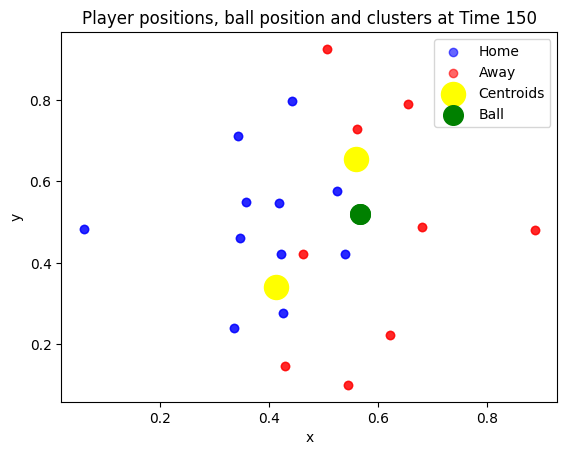

In [30]:
# Filtering the data to only include positions at a specific point in time
time_specific = 150
df_players_ball_specific_time = df_players_ball[df_players_ball['Time [s]'] == time_specific]

# Get the ball position at the specific time
df_ball_specific_time = df_ball[df_ball['Time [s]'] == time_specific]

# Applying K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_players_ball_specific_time[['x', 'y']])

# Add clustering labels to the DataFrame
df_players_ball_specific_time['cluster'] = kmeans.labels_

# Visualizing the player positions, centroid, and clusters
fig, ax = plt.subplots()

# Differentiating between teams
for team, color in zip(['Home', 'Away'], ['blue', 'red']):
    df_team = df_players_ball_specific_time[df_players_ball_specific_time['Team'] == team]
    ax.scatter(df_team['x'], df_team['y'], color=color, alpha=0.6, label=team)

# Centroid
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='yellow', s=300, label='Centroids')

# Ball position (note: if there are multiple ball positions at the same time, this will plot all of them)
ax.scatter(df_ball_specific_time['x'], df_ball_specific_time['y'], color='green', s=200, label='Ball')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Player positions, ball position and clusters at Time {}'.format(time_specific))
ax.legend()

plt.show()


## Interative plot including player positions, ball position, and the centroid during a specific moment in the match

Now the centroids of both sides have shifted again, and the ball is in play again, which shows the players positions at Time 150.

Now let's see if we can make this plot interactive with Time [s] and per period. There are some key advantages for making an interactive plot that will show the centroid over time:
- Experimenting with different clustering configurations to gain insights into the data structure, and in this case the structure of both teams.
- Visually analyze the data makes interpretation more easy and accessible.
- Gain insights beyond clustering. 

In [50]:
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Create widgets for time and period selection
time_slider = widgets.IntSlider(min=df_players_ball['Time [s]'].min(), max=df_players_ball['Time [s]'].max(), step=1, description='Time:')
period_dropdown = widgets.Dropdown(options=df_players_ball['Period'].unique(), description='Period:')

# Define a function to update the plot based on the selected time and period
def update_plot(time, period):
    # Filtering the data to include positions at the selected time and period
    df_players_ball_specific_time_period = df_players_ball[(df_players_ball['Time [s]'] == time) & (df_players_ball['Period'] == period)]
    df_ball_specific_time_period = df_ball[(df_ball['Time [s]'] == time) & (df_ball['Period'] == period)]

    if len(df_players_ball_specific_time_period) > 0:
        # Applying K-means clustering
        kmeans = KMeans(n_clusters=2, random_state=0).fit(df_players_ball_specific_time_period[['x', 'y']])

        # Add clustering labels to the DataFrame
        df_players_ball_specific_time_period['cluster'] = kmeans.labels_

        # Visualizing the player positions, centroid, and clusters
        fig, ax = plt.subplots()

        # Differentiating between teams
        for team, color in zip(['Home', 'Away'], ['blue', 'red']):
            df_team = df_players_ball_specific_time_period[df_players_ball_specific_time_period['Team'] == team]
            ax.scatter(df_team['x'], df_team['y'], color=color, alpha=0.6, label=team)

        # Centroid
        ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='yellow', s=300, label='Centroids')

        # Ball position
        ax.scatter(df_ball_specific_time_period['x'], df_ball_specific_time_period['y'], color='green', s=200, label='Ball')

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title('Player positions, ball position and clusters at Time {} (Period {})'.format(time, period))
        ax.legend()
    else:
        # If no data is available, display a message or handle the case as desired
        plt.figure()
        plt.text(0.5, 0.5, 'No data available for the selected time and period', ha='center', va='center')
        plt.axis('off')

    plt.show()

# Use interactive_output to connect the widgets with the update_plot function
output = widgets.interactive_output(update_plot, {'time': time_slider, 'period': period_dropdown})

# Display the widgets and the plot
display(widgets.HBox([time_slider, period_dropdown]), output)


Output()

With this interactive visualization, we can change Time [s] and the period to get insights on the centroid per specific Time[s] in each period (1 or 2). 

Sometimes there is no data available at a specific Time [s] and/or Period (1/2). This can have various reasons, such as how the data was collected, the sampling rate of the data might not be fine-grained enough to capture data at every time point or for every period, and data points can be filtered out during preprocessing.

The interpretation is freely, because the plot is interactive.  

### Main benefits for coaches
- The visualization enables the coach to observe the positions of the players on the pitch at a certain moment in time. This facilitates the analysis of the team's structure and formation, the identification of gaps or crowded areas, and the evaluation of the overall positioning of players across various game stages.

- Analyzing Player Movement: The coach can examine the team's collective and individual player movement patterns by interacting with the visualization. This can be used to track player runs, examine player posture during offensive or defensive phases, and assess the efficacy of player movement off the ball. It can also be used to determine player roles and duties.

- Making Tactical judgments: The visualization helps the coach to make strategic judgments based on the player positions that have been seen. For instance, they can evaluate the efficacy of defensive or pressing tactics, spot openings to exploit space or open up passing lanes, and make substitutions or positional adjustments to improve the team's performance.







## Static plot for a specific moment in the match

Now I will make some plots to visualize player positions and distances to the ball when time [s] is set at a specific point. This can give insights in the moments of play, formation and player distribution.




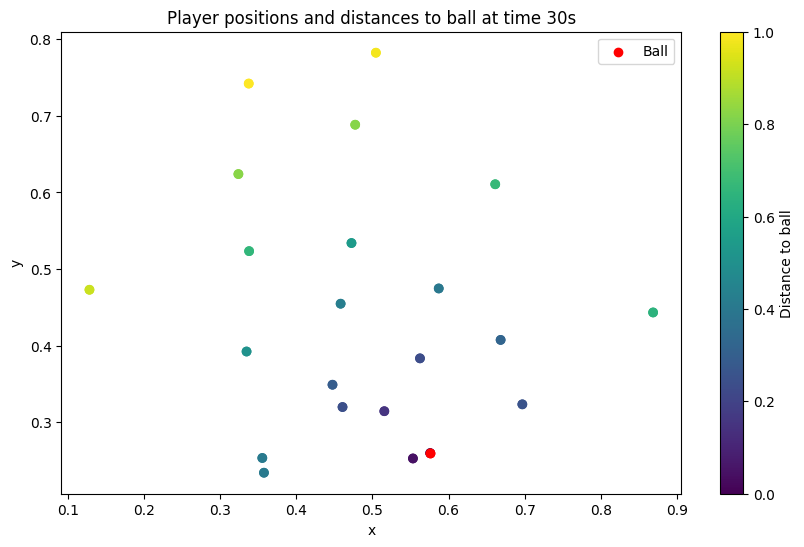

In [32]:
time_specific = 30

# Filtering the data for the players at that time
df_specific_time = df_players_ball[df_players_ball['Time [s]'] == time_specific]

# Filtering the data for the ball at that time
df_ball_specific_time = df_ball[df_ball['Time [s]'] == time_specific]

# Creating a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df_specific_time['x'], df_specific_time['y'], c=df_specific_time['distance_to_ball'])
plt.scatter(df_ball_specific_time['x'], df_ball_specific_time['y'], c='red', label='Ball') # Add the ball as a red point
plt.colorbar(label='Distance to ball')
plt.title(f'Player positions and distances to ball at time {time_specific}s')
plt.xlabel('x')
plt.ylabel('y')
plt.legend() # Adding a legend to explain the colors and markers
plt.show()


Now we can analyze the player positions and their distances to the ball at Time [s] 30. This is helpful to analyze the teams structure during specific moments in the match. If Time [s] is changed, we can analyze their movements. We will make this plot interactive in a later stadium of this notebook.

## Heatmap showing the density of players on the field at a specific moment
We use a technique called kernel density estimation (KDE). This technique estimates the probability density function of a random variable – in this case, the (x, y) position of each player.

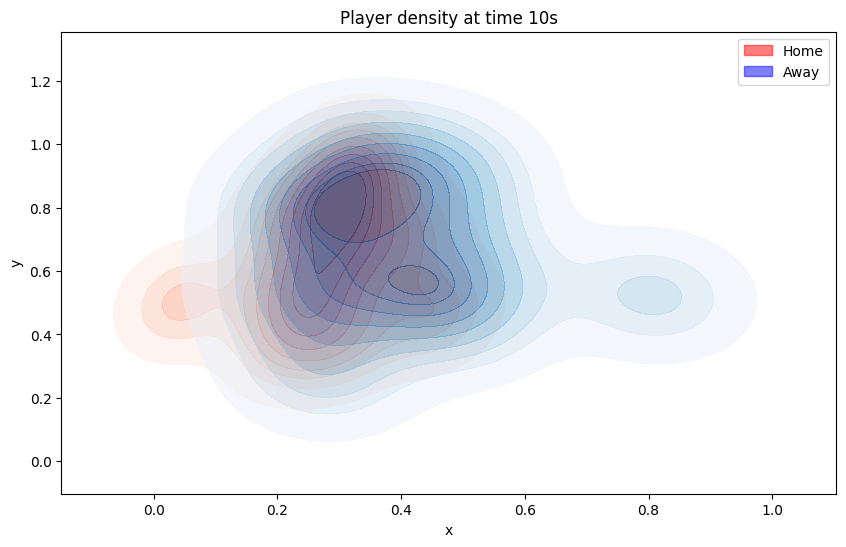

In [33]:
import matplotlib.patches as mpatches
import seaborn as sns

# Select a specific time
time_specific = 10

# Filter the data for that time for each team
df_specific_time_home = df_players_ball[(df_players_ball['Time [s]'] == time_specific) & (df_players_ball['Team'] == 'Home')]
df_specific_time_away = df_players_ball[(df_players_ball['Time [s]'] == time_specific) & (df_players_ball['Team'] == 'Away')]

plt.figure(figsize=(10,6))

# Create a KDE plot for the home team
sns.kdeplot(x=df_specific_time_home['x'], y=df_specific_time_home['y'], cmap='Reds', fill=True, alpha=0.5)

# Create a KDE plot for the away team
sns.kdeplot(x=df_specific_time_away['x'], y=df_specific_time_away['y'], cmap='Blues', fill=True, alpha=0.5)

# Create legend
red_patch = mpatches.Patch(color='red', label='Home', alpha=0.5)
blue_patch = mpatches.Patch(color='blue', label='Away', alpha=0.5)
plt.legend(handles=[red_patch, blue_patch])

plt.title(f'Player density at time {time_specific}s')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


The color intensity represents the density of players: darker areas have a higher density of players. The red represents the home team and blue represents the away team. You can see where each team's players are concentrated at the specified moment in time.


Now let's compare the density with a moment a few seconds (Time [s]) later

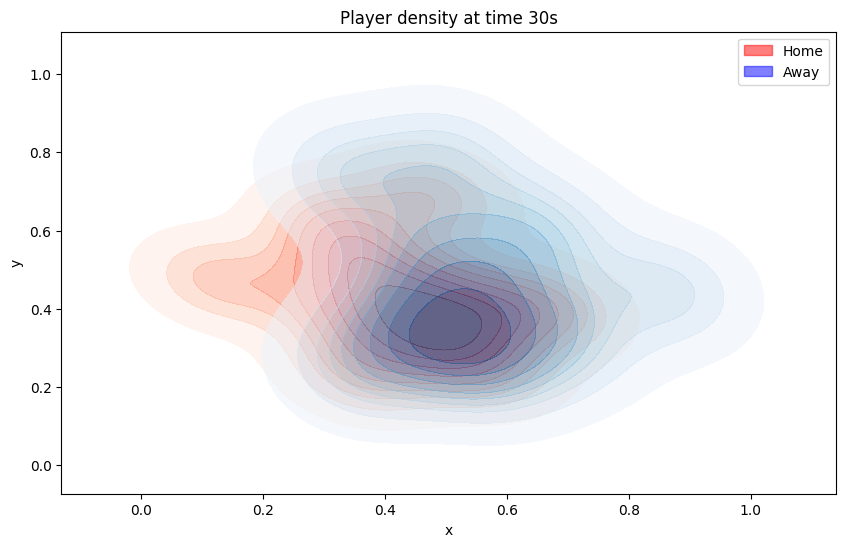

In [34]:
import matplotlib.patches as mpatches
import seaborn as sns

# Select a specific time
time_specific = 30

# Filter the data for that time for each team
df_specific_time_home = df_players_ball[(df_players_ball['Time [s]'] == time_specific) & (df_players_ball['Team'] == 'Home')]
df_specific_time_away = df_players_ball[(df_players_ball['Time [s]'] == time_specific) & (df_players_ball['Team'] == 'Away')]

plt.figure(figsize=(10,6))

# Create a KDE plot for the home team
sns.kdeplot(x=df_specific_time_home['x'], y=df_specific_time_home['y'], cmap='Reds', fill=True, alpha=0.5)

# Create a KDE plot for the away team
sns.kdeplot(x=df_specific_time_away['x'], y=df_specific_time_away['y'], cmap='Blues', fill=True, alpha=0.5)

# Create legend
red_patch = mpatches.Patch(color='red', label='Home', alpha=0.5)
blue_patch = mpatches.Patch(color='blue', label='Away', alpha=0.5)
plt.legend(handles=[red_patch, blue_patch])

plt.title(f'Player density at time {time_specific}s')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


You can see that play has shifted to the other side of the pitch when time is set at 30.

# Event data

Thus far we have only worked with the tracking data, because this provides the spatial-temporal positions of players and the ball. I can now incorporate event data, which provides additional context to the tracking data, such as types of events (shots, passes, tackles), event outcomes, and more.

I will specifically focus on event locations to visualize events (like shots or passes) on the heatmap(s) to see how player concentration correlates with the events.

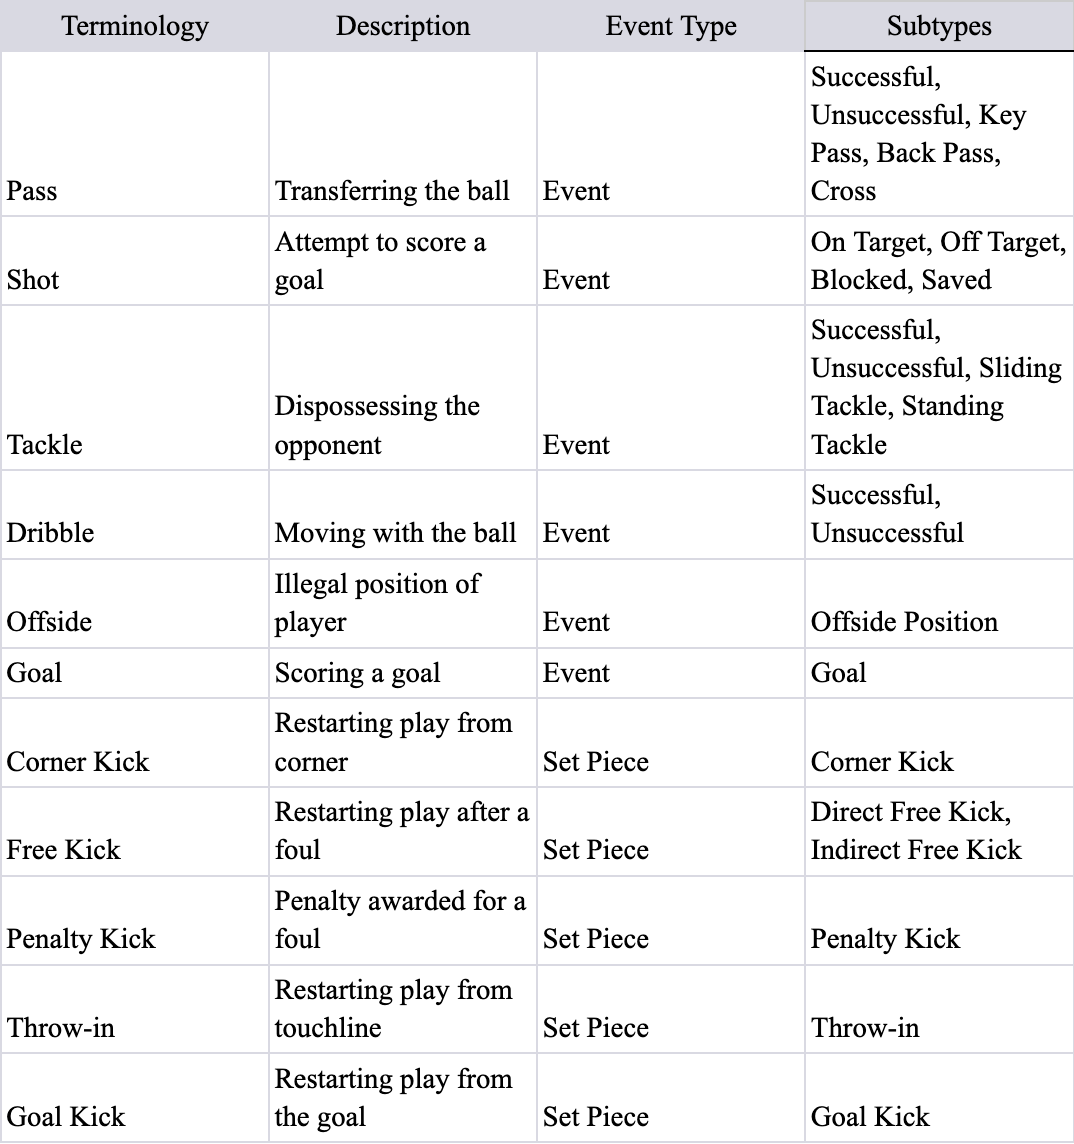

Above is a list of the terminology, discription, event type and the subtypes of the event data.

In [35]:
df_event_data.head(15)

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,1,0.04,0,0.00,Player19,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,1,0.04,3,0.12,Player19,Player21,0.45,0.39,0.55,0.43
2,Away,PASS,NaN,1,3,0.12,17,0.68,Player21,Player15,0.55,0.43,0.58,0.21
3,Away,PASS,NaN,1,45,1.80,61,2.44,Player15,Player19,0.55,0.19,0.45,0.31
4,Away,PASS,NaN,1,77,3.08,96,3.84,Player19,Player21,0.45,0.32,0.49,0.47
5,Away,PASS,NaN,1,191,7.64,217,8.68,Player21,Player22,0.40,0.73,0.32,0.98
6,Away,PASS,NaN,1,279,11.16,303,12.12,Player22,Player17,0.39,0.96,0.49,0.98
7,Away,BALL LOST,INTERCEPTION,1,346,13.84,380,15.20,Player17,NaN,0.51,0.97,0.27,0.75
8,Home,RECOVERY,INTERCEPTION,1,378,15.12,378,15.12,Player2,NaN,0.27,0.78,NaN,NaN
9,Home,BALL LOST,INTERCEPTION,1,378,15.12,452,18.08,Player2,NaN,0.27,0.78,0.59,0.64


In [36]:
df_event_data['Start X'] *= 105
df_event_data['Start Y'] *= 68
df_event_data['End X'] *= 105
df_event_data['End Y'] *= 68


In [37]:
print(df_event_data['Start Time [s]'].describe())


count    1745.000000
mean     2820.135289
std      1677.032488
min         0.040000
25%      1293.520000
50%      2756.800000
75%      4311.480000
max      5744.880000
Name: Start Time [s], dtype: float64


## Passmaps for individual players

An example of a passmap of 'Player15' during the match

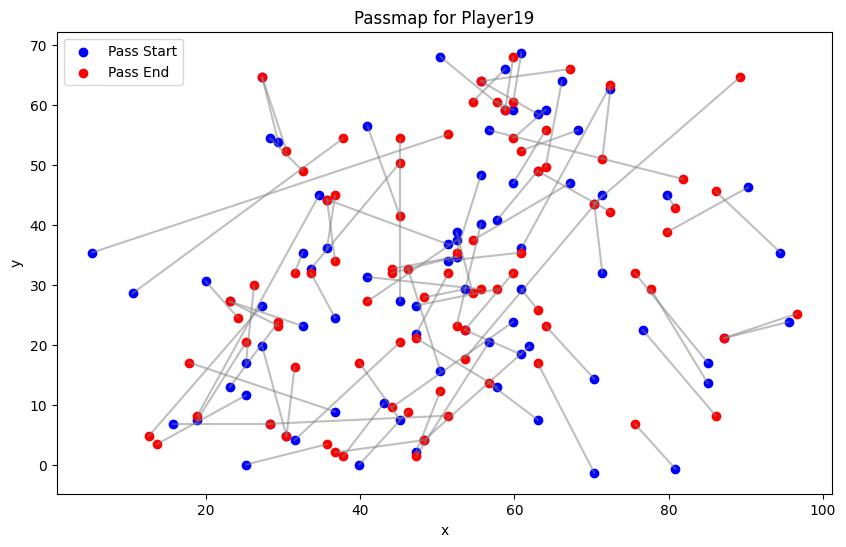

In [38]:
player_name = 'Player19'

# Filter the dataset for passes involving the selected player
passes = df_event_data[df_event_data['Type'] == 'PASS']
player_passes = passes[(passes['From'] == player_name) | (passes['To'] == player_name)]

# Create a scatter plot of pass locations with lines connecting start and end points
plt.figure(figsize=(10, 6))
for i in range(len(player_passes)):
    plt.plot([player_passes.iloc[i]['Start X'], player_passes.iloc[i]['End X']],
             [player_passes.iloc[i]['Start Y'], player_passes.iloc[i]['End Y']],
             color='gray', alpha=0.5)
plt.scatter(player_passes['Start X'], player_passes['Start Y'], color='blue', label='Pass Start')
plt.scatter(player_passes['End X'], player_passes['End Y'], color='red', label='Pass End')
plt.title('Passmap for {}'.format(player_name))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


We can tell from this passmap that this player was quite active during the match. Most passes occured from the center of the pitch, which can indicate that Player 19 is a midfielder, but he also likes to drop wide to sent passes from the wings. Unfortunately, the dataset does not include information if passes were succesful or not.

Now let's try a passmap for a different player. We will also filter the passes from the first half with 'period' set to 1. The first half is period 1, the second half is period 2. This gives insights about the players' positions and on-pitch behavior related to passing.

I chose Player2 who plays for the home team.

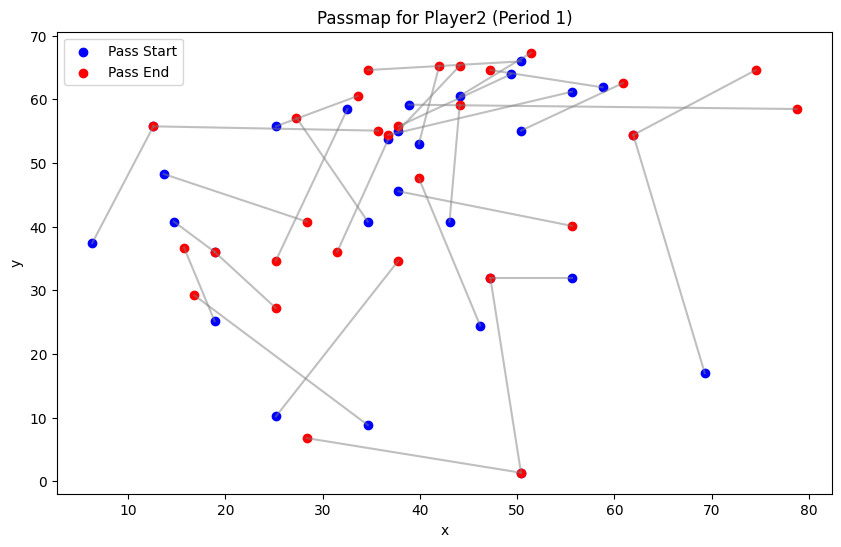

In [39]:
import matplotlib.pyplot as plt

# Select a specific player and period
player_name = 'Player2'
period = 1

# Filter the dataset for passes involving the selected player and period
passes = df_event_data[(df_event_data['Type'] == 'PASS') & (df_event_data['Period'] == period)]
player_passes = passes[(passes['From'] == player_name) | (passes['To'] == player_name)]

# Create a scatter plot of pass locations with lines connecting start and end points
plt.figure(figsize=(10, 6))
for i in range(len(player_passes)):
    plt.plot([player_passes.iloc[i]['Start X'], player_passes.iloc[i]['End X']],
             [player_passes.iloc[i]['Start Y'], player_passes.iloc[i]['End Y']],
             color='gray', alpha=0.5)
plt.scatter(player_passes['Start X'], player_passes['Start Y'], color='blue', label='Pass Start')
plt.scatter(player_passes['End X'], player_passes['End Y'], color='red', label='Pass End')
plt.title('Passmap for {} (Period {})'.format(player_name, period))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


We can tell that Player2 is a left-back, because this is where most of his passes came from. He also is quite an attacking player, because most passes occured in midfield. However, he does not pass forward quite often, and chooses to pass backwards instead.

Now let's add a filter so that we can switch quickly between the first and second half. This will give us insights in how his play developed during the match.

In [40]:
import ipywidgets as widgets
from IPython.display import display

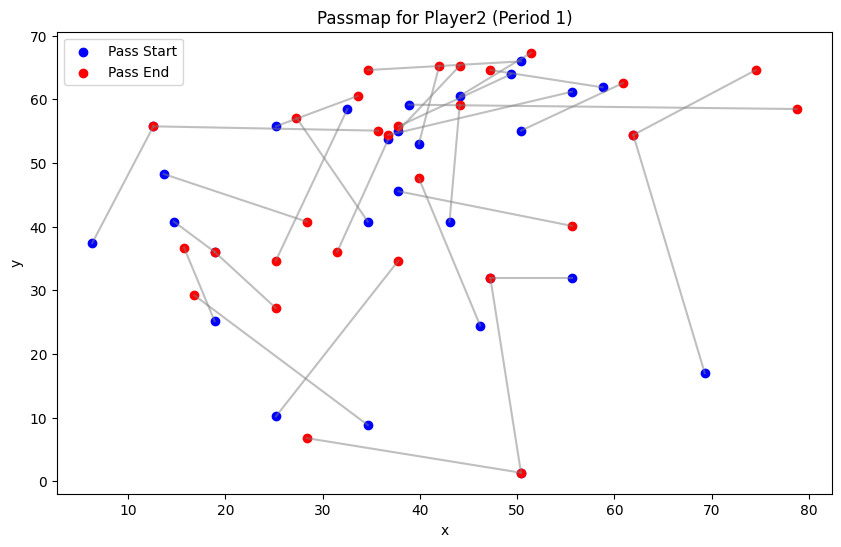

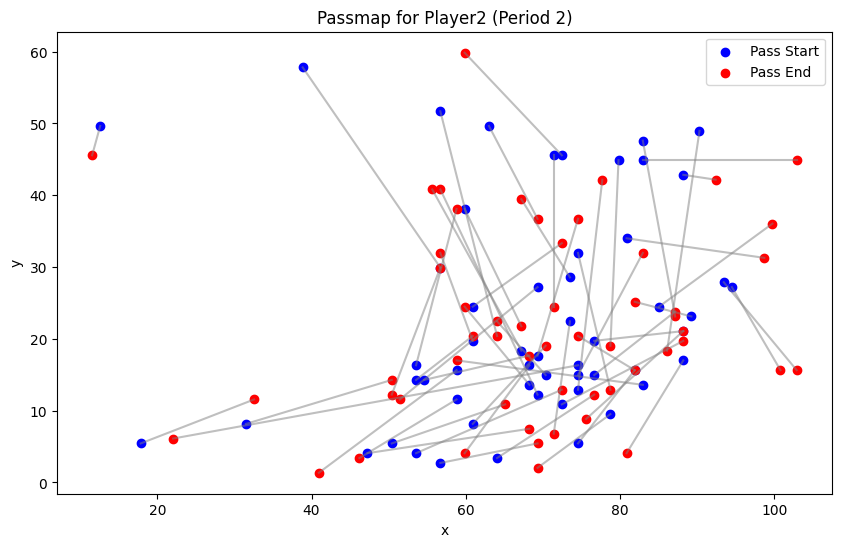

In [41]:
import matplotlib.pyplot as plt

# Select a specific player
player_name = 'Player2'

# Filter function to switch between periods
def filter_passes_by_period(player_passes, period):
    return player_passes[player_passes['Period'] == period]

# Filter the dataset for passes involving the selected player
passes = df_event_data[df_event_data['Type'] == 'PASS']
player_passes = passes[(passes['From'] == player_name) | (passes['To'] == player_name)]

# Create a function to plot the passmap for a specific period
def plot_passmap(period):
    fig, ax = plt.subplots(figsize=(10, 6))
    player_passes_filtered = filter_passes_by_period(player_passes, period)
    for i in range(len(player_passes_filtered)):
        ax.plot([player_passes_filtered.iloc[i]['Start X'], player_passes_filtered.iloc[i]['End X']],
                [player_passes_filtered.iloc[i]['Start Y'], player_passes_filtered.iloc[i]['End Y']],
                color='gray', alpha=0.5)
    ax.scatter(player_passes_filtered['Start X'], player_passes_filtered['Start Y'], color='blue', label='Pass Start')
    ax.scatter(player_passes_filtered['End X'], player_passes_filtered['End Y'], color='red', label='Pass End')
    ax.set_title('Passmap for {} (Period {})'.format(player_name, period))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    plt.show()

# Iterate over the available periods and display the passmap for each
for period in [1, 2]:
    plot_passmap(period)


We now have proof that Player2 is a left-back, because in period 2 his whole passingmap occurs from the left side of the pitch. We can also see that the player was much more active in the second half, also defensively. The player did not attack as much anymore, but let's see if we can visualize this with a heatmap and passmap combined

<ipython-input-42-9ca7e663079e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_data['x_bin'] = pd.cut(period_data['Start X'], bins=bins_x)
<ipython-input-42-9ca7e663079e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_data['y_bin'] = pd.cut(period_data['Start Y'], bins=bins_y)
<ipython-input-42-9ca7e663079e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

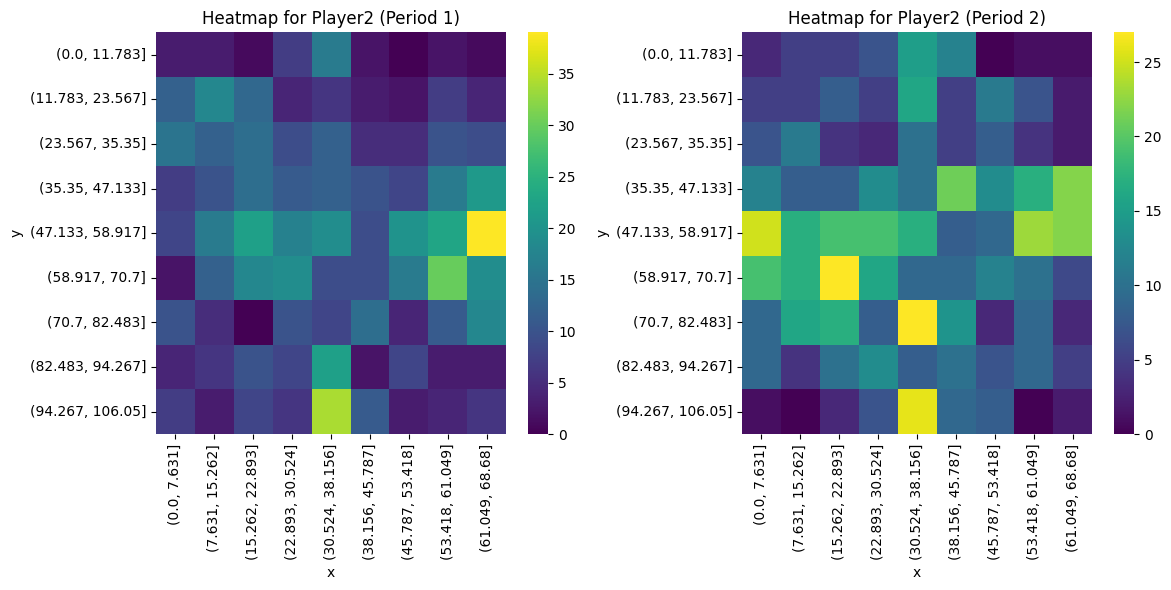

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a specific player
player_name = 'Player2'

# Filter function to switch between periods
def filter_passes_by_period(player_passes, period):
    return player_passes[player_passes['Period'] == period]

# Filter the dataset for passes involving the selected player
passes = df_event_data[df_event_data['Type'] == 'PASS']
player_passes = passes[(passes['From'] == player_name) | (passes['To'] == player_name)]

# Create a function to plot the heatmap for a specific period
def plot_heatmap(period):
    # Filter the dataset for the specific period
    period_data = df_event_data[df_event_data['Period'] == period]

    # Discretize the field into a grid of cells
    bins_x = np.linspace(0, period_data['Start X'].max(), 10)
    bins_y = np.linspace(0, period_data['Start Y'].max(), 10)
    period_data['x_bin'] = pd.cut(period_data['Start X'], bins=bins_x)
    period_data['y_bin'] = pd.cut(period_data['Start Y'], bins=bins_y)

    # Count the number of events that fall into each cell
    heatmap_data = period_data.groupby(['x_bin', 'y_bin']).size().unstack()

    # Plot the heatmap
    ax = plt.subplot(1, 2, period)
    sns.heatmap(heatmap_data, cmap='viridis', ax=ax)
    ax.set_title('Heatmap for Player2 (Period {})'.format(period))
    ax.set_xlabel('x')
    ax.set_ylabel('y')

# Create the combined plot
fig = plt.figure(figsize=(12, 6))

# Plot the heatmap for period 1
plot_heatmap(1)

# Plot the heatmap for period 2
plot_heatmap(2)

# Adjust the layout and spacing
plt.tight_layout()

# Display the combined plot
plt.show()


Both heatmaps and the earlier plotted passmaps proof that this player is left-back. In the heatmap and passingmap of Period 1, we concluded that the player was a big higher up the field, but not active at all.

In both maps of Period2, we can see that the player was more active on the left side with higher frequencies. Also, he was sometimes active of the right side.

# Interactive 'dashboard'

I want to make this notebook more interactive so that it is more accessible and can be connected to the Figma prototype. This is also how the data/ml will be connected to the UX to complete the data-driven loop.

We will focus on the following points to make that happen:

- Interactive Heatmap with Slider: Instead of displaying separate heatmaps for each period, I can use a slider to dynamically update the heatmap based on the selected period. The slider can control the time frame within each period.

- Player Event Data Visualization: I can create interactive visualizations that display specific event data per player over the course of Period 1 and/or Period 2. 

- Player Selection Dropdown: Introduce a dropdown menu that allows the user to select a specific player, and update the visualizations to focus on that player's data. This can include updating the heatmap, event data visualization, or any other relevant plots.

I've tried making an interactive dashboard using Bokeh and Dash, unfortunately these packages run on JavaScript, and Python and JavaScript are not very compatible. Thus, I chose to make this 'dashboard' in this same file with various interactive visualizations which can give insights into specific team and player data, player locations and distribution using event and tracking data.

## Interative heatmap

In [43]:
df_players_ball.columns

Index(['Period', 'Frame', 'Time [s]', 'Player', 'x', 'y', 'Team',
       'Player_ball', 'x_ball', 'y_ball', 'Team_ball', 'distance_to_ball',
       'cluster'],
      dtype='object')

In [44]:
df_players_ball['Period'] = pd.cut(df_players_ball['Time [s]'], bins=[0, 2700, np.inf], labels=[1, 2])

unique_players = df_players_ball['Player'].unique().tolist()
unique_teams = df_players_ball['Team'].unique().tolist()

# Function to calculate the heatmap data for a specific player and period
def calculate_heatmap_data(player, team, period):
    filtered_tracking = df_players_ball[(df_players_ball['Player'] == player) & (df_players_ball['Team'] == team) & (df_players_ball['Period'] == period)]
    heatmap_data, x_edges, y_edges = np.histogram2d(filtered_tracking['x'], filtered_tracking['y'], bins=[10, 10], range=[[0, 1], [0, 1]])
    return heatmap_data

# Function to update the heatmap based on the selected player, team and period
def update_heatmap(player, team, period):
    fig, ax = plt.subplots(figsize=(8, 6))
    heatmap_data = calculate_heatmap_data(player, team, period)
    sns.heatmap(heatmap_data, cmap=cmap, ax=ax)
    ax.set_title(f"Heatmap for {team}'s {player} (Period {period})")
    plt.show()

initial_player = unique_players[0]
initial_period = 1
initial_team = unique_teams[0]
cmap = 'viridis'

player_dropdown = widgets.Dropdown(options=unique_players, value=initial_player, description='Player:')
period_slider = widgets.IntSlider(min=1, max=2, step=1, value=initial_period, description='Period')
team_dropdown = widgets.Dropdown(options=unique_teams, value=initial_team, description='Team:')

interactive_plot = widgets.interactive_output(update_heatmap, {'player': player_dropdown, 'period': period_slider, 'team': team_dropdown})

display(widgets.VBox([team_dropdown, player_dropdown, period_slider]))
display(interactive_plot)


Output()

These interactive heatmaps are useful to identify the areas where players position themselves most often during the first and second halves. The highest frequency means that the player often occurs on this area of the pitch and can give the coach insights into their positioning and movement and formation. By combining personalized tactical advice with this visualization, the coach can identify strengths and weaknesses and maybe even make tactical changes and decisions himself one day.

## Player Event Data Visualization

In [45]:
period1_data = df_event_data[df_event_data['Period'] == 1]
period2_data = df_event_data[df_event_data['Period'] == 2]

unique_teams = df_event_data['Team'].unique()

player_dropdown = widgets.Dropdown(options=unique_players, description='Player:')
team_dropdown = widgets.Dropdown(options=unique_teams, description='Team:')

In [46]:
def update_visualization(player, team):
    plt.clf()
    
    player_data_period1 = period1_data[(period1_data['From'] == player) | (period1_data['To'] == player)]
    player_data_period1 = player_data_period1[player_data_period1['Team'] == team]

    player_data_period2 = period2_data[(period2_data['From'] == player) | (period2_data['To'] == player)]
    player_data_period2 = player_data_period2[player_data_period2['Team'] == team]

    event_colors = {'pass': 'green', 'recovery': 'blue'}

    if player_data_period1.empty and player_data_period2.empty:
        print("No data available for the selected player and team.")
        return

    plt.figure(figsize=(10, 6))

    if not player_data_period1.empty:
        plt.subplot(1, 2, 1)
        sns.countplot(x='Type', data=player_data_period1, palette=event_colors.values())
        plt.title(f'Event Types for {player} (Period 1 - {team})')
        plt.xticks(rotation=45, ha='right', fontsize=8)  

    if not player_data_period2.empty:
        plt.subplot(1, 2, 2)
        sns.countplot(x='Type', data=player_data_period2, palette=event_colors.values())
        plt.title(f'Event Types for {player} (Period 2 - {team})')
        plt.xticks(rotation=45, ha='right', fontsize=8) 

    plt.tight_layout()

    plt.show()


output = widgets.interactive_output(update_visualization, {'player': player_dropdown, 'team': team_dropdown})

display(widgets.HBox([player_dropdown, team_dropdown]), output)


Output()

<Figure size 640x480 with 0 Axes>

Now users can select players based on their kitnumer, for example 'Player6' and get insights about individual statistics during the first and second half. Like said before, it is not possible to get insights if passes were succesful or not.

## Interactive passmap per player

In [47]:
pass_data = df_event_data[['From', 'To', 'Start X', 'Start Y', 'End X', 'End Y', 'Period', 'Team']]


Drop-down menu per player, period and team

In [48]:
player_dropdown = widgets.Dropdown(options=pass_data['From'].unique(), description='Player:')
period_dropdown = widgets.Dropdown(options=pass_data['Period'].unique(), description='Period:')
team_dropdown = widgets.Dropdown(options=pass_data['Team'].unique(), description='Team:')


Function that updates and displays the passmap based on the selected player

In [49]:
def update_passmap(player, period, team):
    filtered_pass_data = pass_data[(pass_data['From'] == player) & (pass_data['Period'] == period) & (pass_data['Team'] == team)]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title(f'Passmap for {player} (Period {period}) - {team}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    for _, row in filtered_pass_data.iterrows():
        ax.plot([row['Start X'], row['End X']], [row['Start Y'], row['End Y']], color='gray', alpha=0.5)
    ax.scatter(filtered_pass_data['Start X'], filtered_pass_data['Start Y'], color='blue', label='Pass Start')
    ax.scatter(filtered_pass_data['End X'], filtered_pass_data['End Y'], color='red', label='Pass End')

    pass_legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Pass Start'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Pass End')]
    ax.legend(handles=pass_legend)
    
    plt.show()

output = widgets.interactive_output(update_passmap, {'player': player_dropdown, 'period': period_dropdown, 'team': team_dropdown})

display(widgets.HBox([player_dropdown, period_dropdown, team_dropdown]), output)

Output()

With this interactive passmap, coaches can analyze passes of their players during the match. In this case, there is also data available from the away team. I did not make a distinction between home and away when I merged the two datasets before. When a player is selected in this passmap, for example Player10, and the away team is selected, nothing is shown. This is because Player10 plays for the home team. 

Additionally, some players only have data available in Period2, because they were on the bench during the first half, and subsituted in the second.

# Conclusion

This notebook and the data-driven (interactive) visualizations can contribute to the identified tactical advice from the Figma prototype. They contribute to tactical insights and advice by giving coaches a deeper understanding of the game dynamics and enabling them to make informed decisions. Here's how the interactive data-driven visualizations can address the points from the animated visualization in Figma:

1. In the 35th minute, the opposition number 6 has the ball in midfield. They are organized, while your team is loosely clustered around the pitch.
- Using visualizations such as heatmaps or Voronoi diagrams to analyze the positioning and clustering of the team compared to the opposition. Identifying areas where the team needs to improve organization and tighten the clusters.

2. There is too much space behind the defenders because they are too far infield. This leaves areas behind the defenders and on the flanks. Also, your central defenders are too far apart.
- Heatmaps or space occupation over time visualizations can highlight areas of the field where the defenders are not effectively covering. Analyzing the movement patterns of defenders and identifying areas where they need to position themselves to minimize the space behind them. Using the visualizations to provide specific instructions to the defenders regarding their positioning.

3. This allowed playing a long ball to their winger, which exploits the open space.
- Visualizations such as passing maps or trajectory plots can help identify passing patterns and opportunities for exploiting open spaces. Analyzing the passing patterns encourage the team to be aware of the open spaces and exploit them with precise long balls.

4. Additionally, your midfielders are not tracking back effectively, and the opposition can form a triangle in your own half.
- Using visualizations such as player movement trajectories or heatmaps to analyze the movement and tracking of your midfielders. Identifying areas where they are not effectively tracking back and closing down the opposition. Providing specific instructions to improve their tracking and defensive positioning.

5. Another through ball can be played because your defenders are too deep in their own half, creating a large gap between the midfielders and defenders.
- Visualizations that depict the spatial relationship between defenders and midfielders, such as Voronoi diagrams or space occupation over time, can help identify gaps and areas where the defensive line needs adjustment. Instruct the defenders to maintain a compact defensive shape and communicate with the midfielders to close the gaps.

6. From this point on, it is almost impossible to prevent them from scoring. This also happens with a simple cross to their striker. The lack of vertical and horizontal control has provided their striker to score.
- Analyze defensive positioning and movement patterns using visualizations such as trajectory plots or defensive heatmaps. Identifying areas where there is a lack of control and organization. Providing specific instructions to improve vertical and horizontal control, such as closing down crosses and maintaining a tight defensive structure.
